Performance of the threshold on Pre and post diaster images base on NDWI

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters
from PIL import Image
from skimage.filters import threshold_minimum, threshold_triangle
from skimage import io

NDWI pre disater

In [46]:
NDWI_pre= Image.open("part_2_2023-06-22_Sentinel-2_L2A_NDWI_20_%_clouds.tiff")

# Convert the image to a NumPy array
NDWI_pre= np.array(NDWI_pre)

In [47]:
blue_channel, green_channel, red_channel = cv2.split(NDWI_pre)
ndwi_pre = (green_channel.astype(float) - red_channel.astype(float)) / (green_channel.astype(float) + red_channel.astype(float))

Text(0.5, 1.0, 'Normalized Difference Water Index (NDWI)')

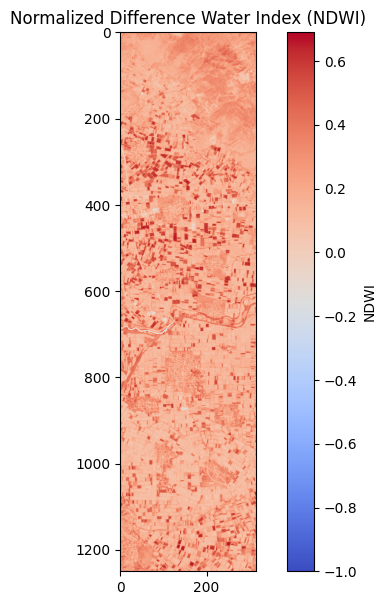

In [48]:
plt.figure(figsize=(8, 7))
plt.imshow(ndwi_pre, cmap='coolwarm')
# Reverse the direction of the left axis
#plt.gca().invert_yaxis()
cbar=plt.colorbar(label='NDWI')
# Invert the col#orbar axis
plt.title('Normalized Difference Water Index (NDWI)')
#plt.show()

In [49]:
threshold_value_triangle_pre=filters.threshold_triangle(ndwi_pre)
print("threshold_value :",threshold_value_triangle)

threshold_value : -0.007712977707006352


In [50]:
threshold_otsu_pre= filters.threshold_otsu(ndwi_pre)
print("threshold_value :",threshold_otsu_post)

threshold_value : 0.21203224522292996


In [51]:
threshold_std_pre= np.std(ndwi_pre)
print("threshold_standardeviation :",threshold_std_pre)

threshold_standardeviation : 0.12800758756353017


In [52]:
X_ndwi_pre=[]
Y_ndwi_pre=[]
intensity_values_red_pixels=[]
for y in range(ndwi_pre.shape[0]):
    for x in range(ndwi_pre.shape[1]):
        # Youc
        if ndwi_pre[y, x] < threshold_value_triangle_pre:
            X_ndwi_pre.append(x)
            Y_ndwi_pre.append(y)
        else:
            
            X_ndwi_pre.append(0)
            Y_ndwi_pre.append(0)

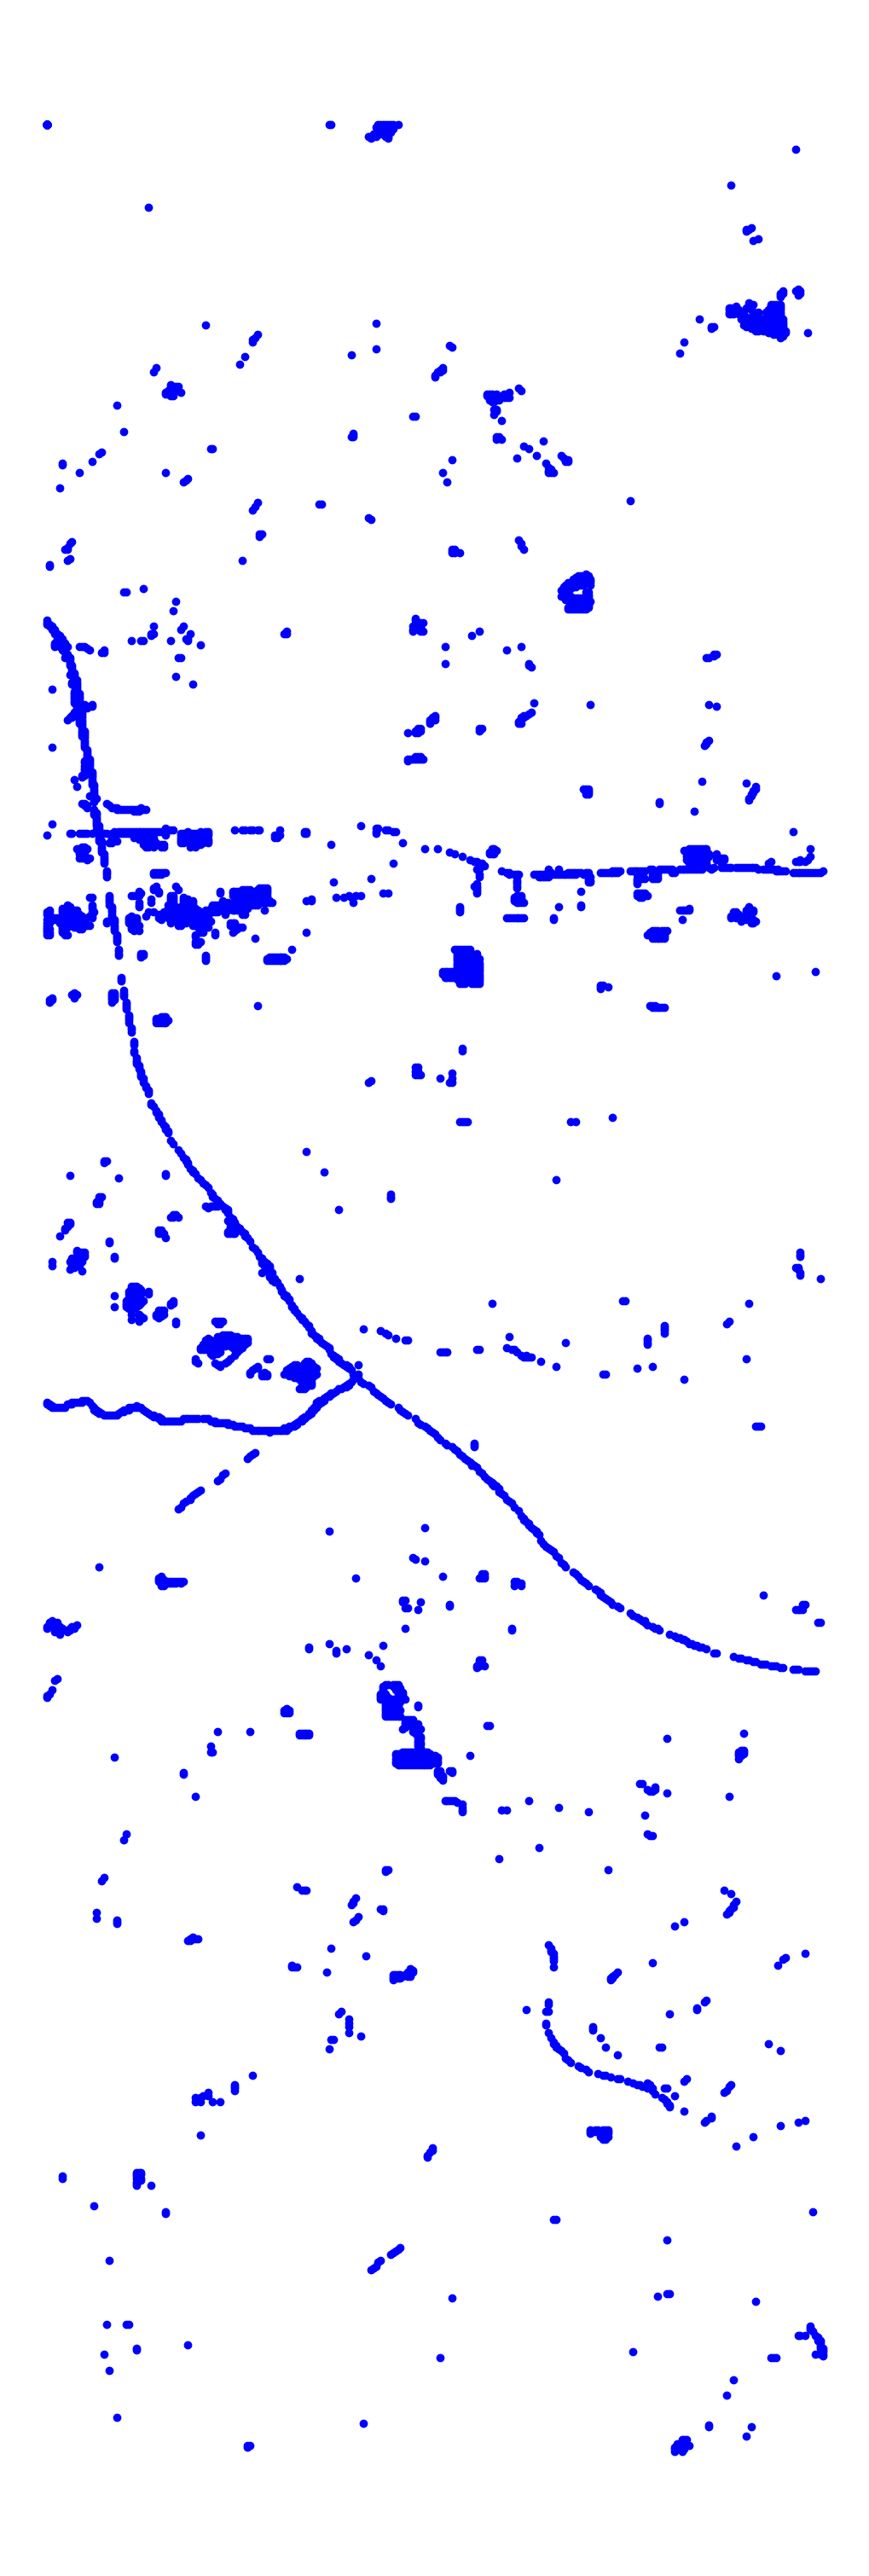

In [53]:
show=False
fig, ax = plt.subplots(figsize=(10, 30) if not show else (20, 20))
# Plot the red pixel positions
ax.scatter(X_ndwi_pre, Y_ndwi_pre, c='blue')


# Set the background color to transparent
fig.patch.set_alpha(0)
# Invert the x-axis
plt.gca().invert_xaxis()  # Invert the x-axis
# Rotate the image 180 degrees
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.axis('off')

# Remove the white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)



# Save the plot without the white border
plt.savefig('part_2_NDWI_pre.png', transparent=True, bbox_inches='tight', pad_inches=0)

NDWI post disaster

In [23]:
NDWI_post= Image.open("part_1_-2023-09-10_Sentinel-2_L2A_NDWI_20_%_clouds.tiff")

# Convert the image to a NumPy array
#image_array_pre = np.array(image_pre)
NDWI_post= np.array(NDWI_post)

In [24]:
blue_channel, green_channel, red_channel = cv2.split(NDWI_post)
ndwi_post = (green_channel.astype(float) - red_channel.astype(float)) / (green_channel.astype(float) + red_channel.astype(float))

Text(0.5, 1.0, 'Normalized Difference Water Index (NDWI)')

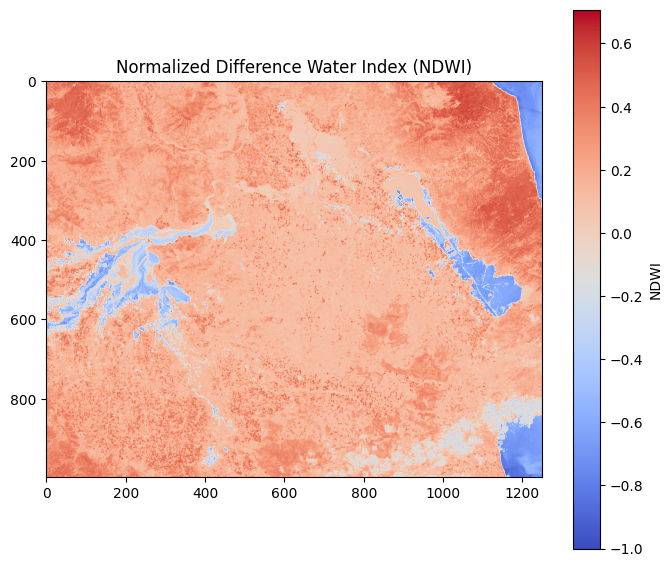

In [25]:
plt.figure(figsize=(8, 7))
plt.imshow(ndwi_post, cmap='coolwarm')
# Reverse the direction of the left axis
#plt.gca().invert_yaxis()
cbar=plt.colorbar(label='NDWI')
# Invert the col#orbar axis
plt.title('Normalized Difference Water Index (NDWI)')
#plt.show()

In [26]:
threshold_value_triangle_post=filters.threshold_triangle(ndwi_post)
print("threshold_value :",threshold_value_triangle_post)

threshold_value : -0.009622713414634165


In [27]:
threshold_value_otsu_post= filters.threshold_otsu(ndwi_post)
print("threshold_value :",threshold_value_otsu_post)

threshold_value : -0.16301448170731708


In [28]:
threshod_std_post= np.std(ndwi_post)
print("threshold_standardeviation :",threshod_std_post)

threshold_standardeviation : 0.23128433713043464


In [29]:
 # Iterate over each pixel in the image to get the intensity and the position of the red pixels (change detection)
X_ndwi_post=[]
Y_ndwi_post=[]
intensity_values_red_pixels=[]
for y in range(ndwi_post.shape[0]):
    for x in range(ndwi_post.shape[1]):
      
        if ndwi_post[y, x] <threshold_value_triangle_post:
            # Get the intensity value of the red pixel
            X_ndwi_post.append(x)
            Y_ndwi_post.append(y)
        else:
            intensity_values_red_pixels.append(0)
            X_ndwi_post.append(0)
            Y_ndwi_post.append(0)

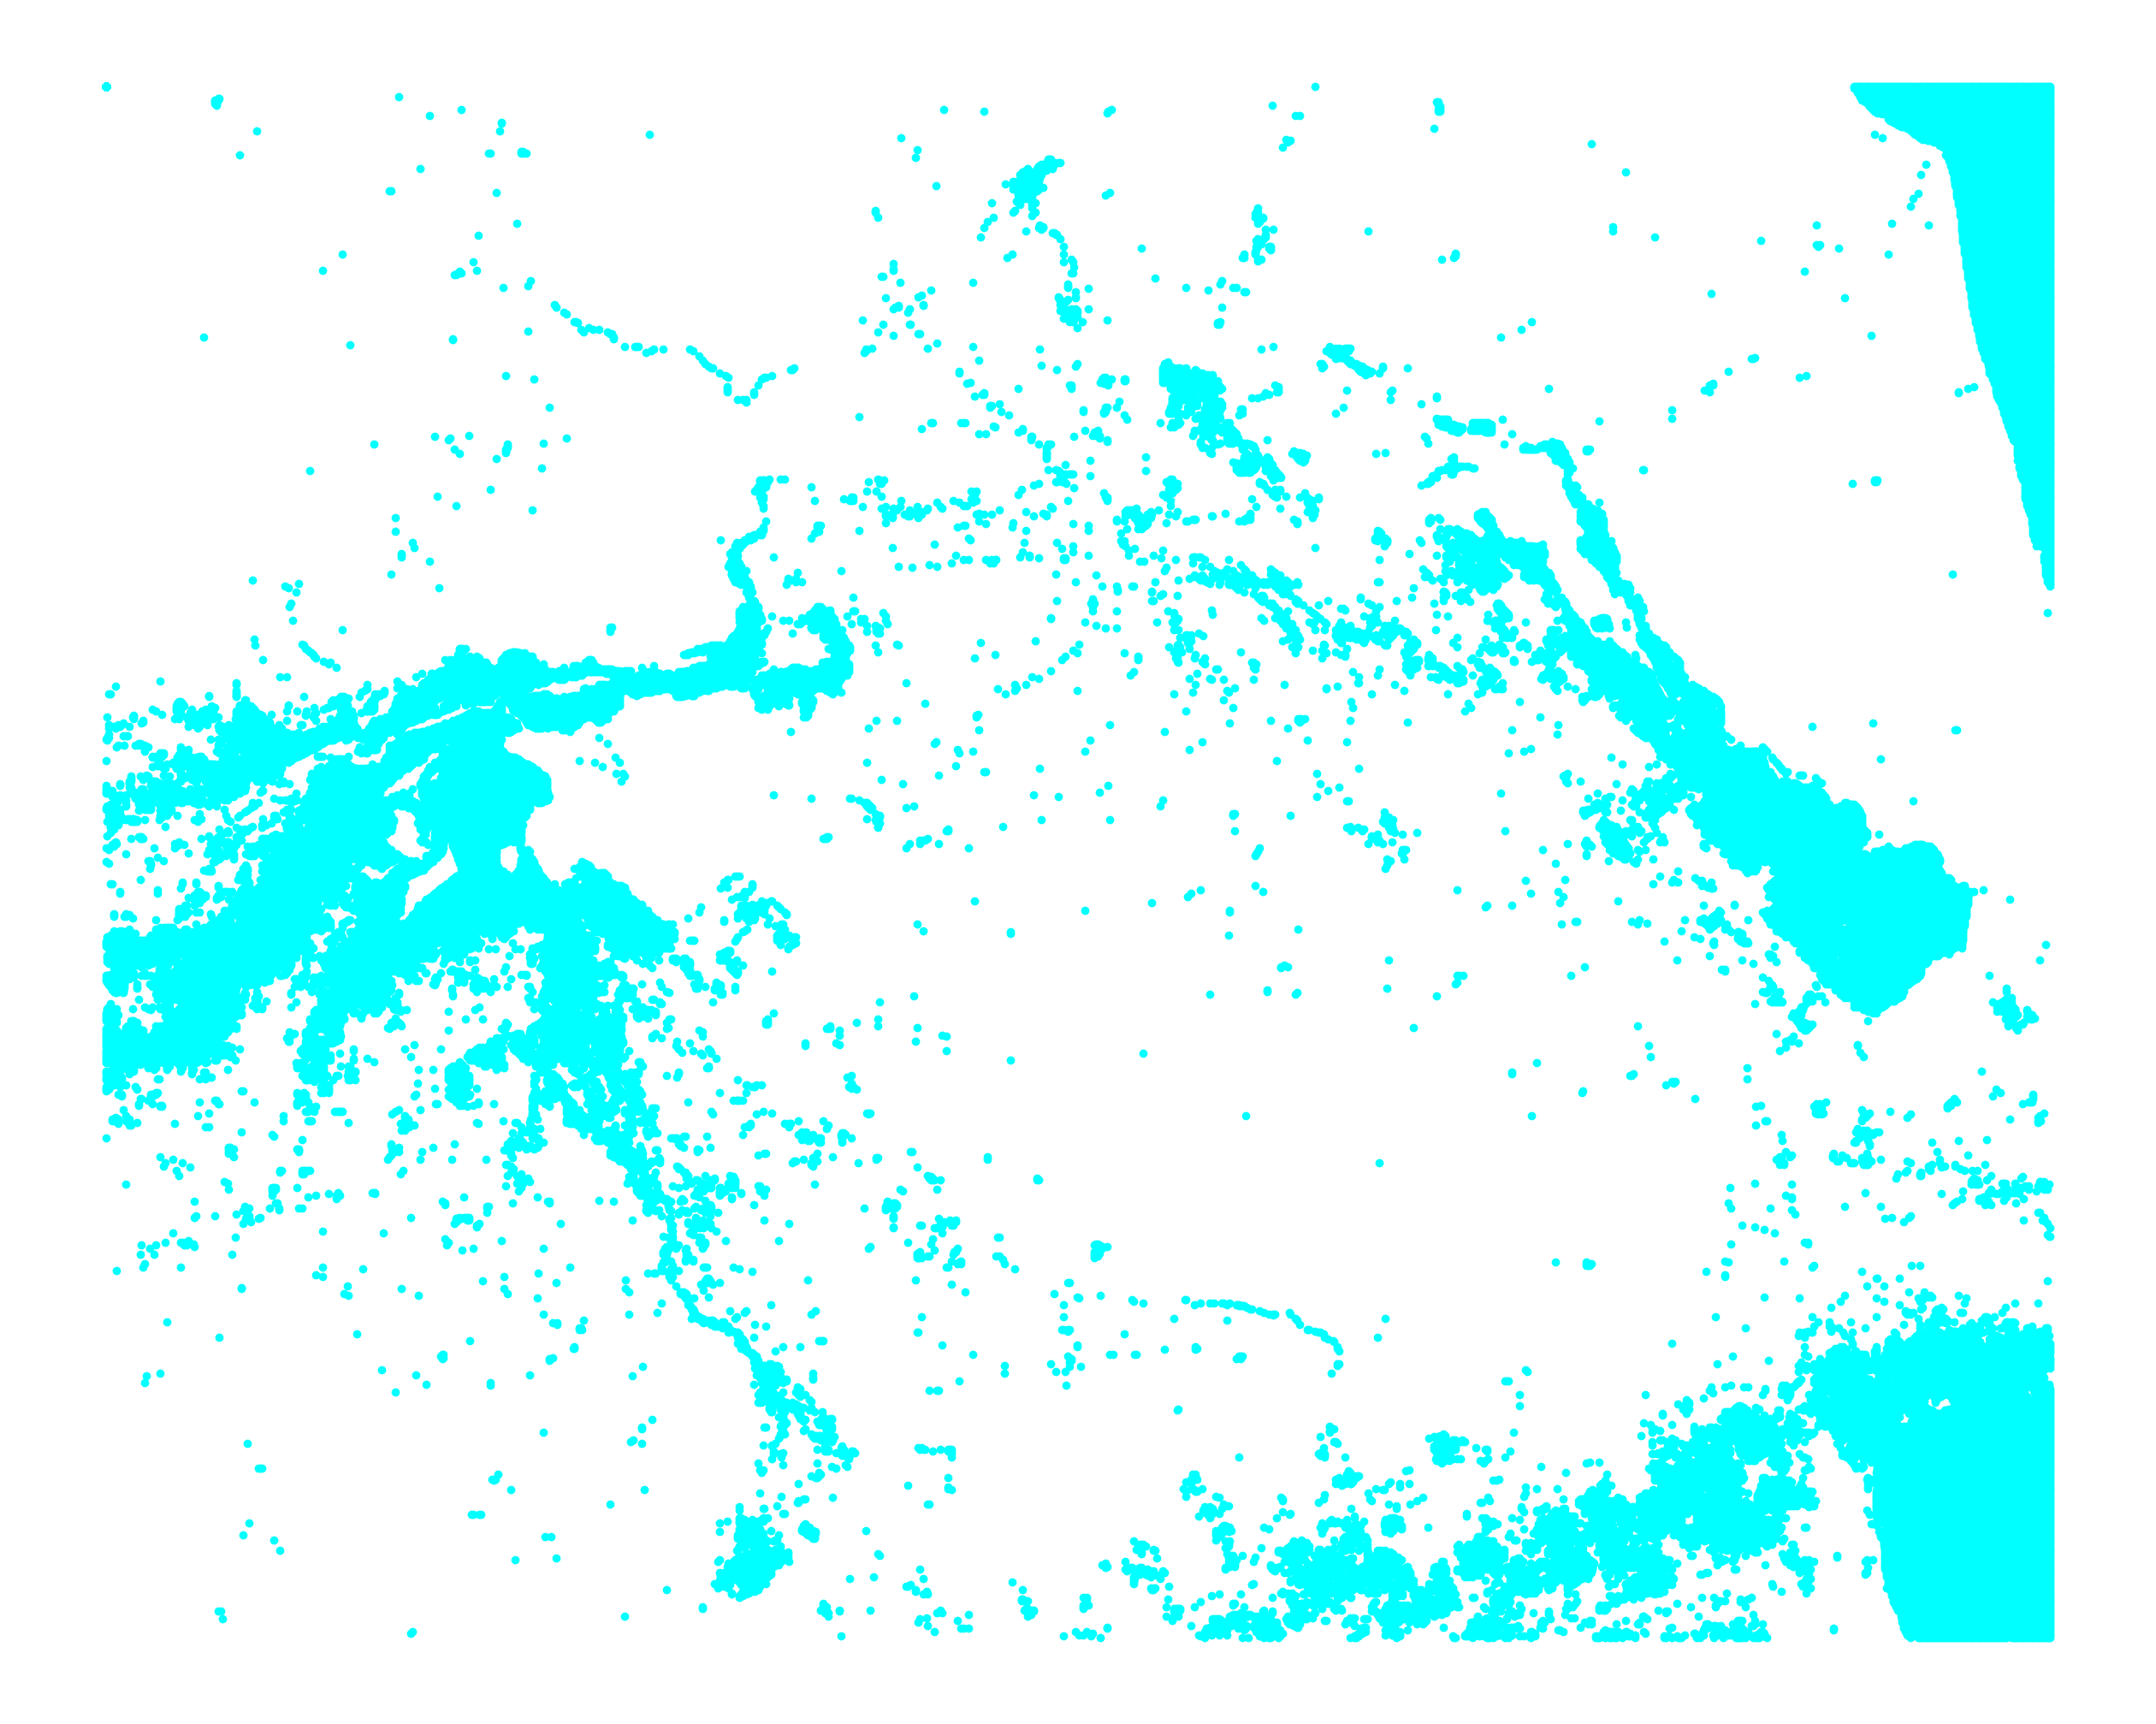

In [30]:
show=False
fig, ax = plt.subplots(figsize=(25,19.95) if not show else (10, 10))
# Plot the red pixel positions
ax.scatter(X_ndwi_post, Y_ndwi_post, c='cyan')
# Rotate the plot counterclockwise by 180 degrees

# Set the background color to transparent
#fig.patch.set_alpha(0)
# Invert the x-axis
plt.gca().invert_xaxis()  # Invert the x-axis
# Rotate the image 180 degrees
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.axis('off')

# Remove the white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)



# Save the plot without the white border
plt.savefig('part_1_NDWI_post.png',facecolor='#8B4513', bbox_inches='tight', pad_inches=0)

In this part, we compare the images pre- and post-disaster with the NDWI (ground truth). For each comparison, we need to change the threshold value in the code " Thresholding" and use the 4 thresholds each time and download the images water_pre and water_post for the 4 thresholds . Finally, you can compare the 4 images pre and 4 images post with NDWI_pre and NDWI_post. You will get 4 IoU and 4 Recall values 

In [2]:
#import the images above 
image_water_pre= Image.open("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/triangle_part_2_2023-06-27_water_pre.png")
image_water_post= Image.open("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/CD.png")
image_ndwi_pre=Image.open("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/triangle_part_2_NDWI_pre.png")
image_ndwi_post=Image.open("/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/GT_CEMS.png")

In [3]:
# Convert the image to a NumPy array
image_array_ndwi_pre = np.array(image_ndwi_pre)
image_array_ndwi_post = np.array(image_ndwi_post)

image_array_water_pre = np.array(image_water_pre)
image_array_water_post = np.array(image_water_post)

In [4]:
def calculate_iou(predicted_mask, ground_truth_mask):
    intersection = np.logical_and(predicted_mask, ground_truth_mask)
    union = np.logical_or(predicted_mask, ground_truth_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou


In [5]:
def calculate_recall(predicted_mask, ground_truth_mask):
    true_positive = np.logical_and(predicted_mask, ground_truth_mask)
    false_negative = np.logical_and(np.logical_not(predicted_mask), ground_truth_mask)
    recall = np.sum(true_positive) / (np.sum(true_positive) + np.sum(false_negative))
    return recall

In [6]:
iou = calculate_iou(image_array_ndwi_pre, image_array_water_pre)
print("IoU_pre_disaster:", iou)

IoU_pre_disaster: 0.8364549023574558


In [7]:
recall= calculate_recall(image_array_ndwi_pre, image_array_water_pre)
print("Recall_pre_disaster:", recall)

Recall_pre_disaster: 0.9279099695745225


In [8]:
iou = calculate_iou(image_array_ndwi_post, image_array_water_post)
print("IoU_post_disaster:", iou)

IoU_post_disaster: 0.015193737565685726


In [9]:
recall= calculate_recall(image_array_ndwi_post, image_array_water_post)
print("Recall_post_disaster:", recall)

Recall_post_disaster: 0.015294589377217371
